<a href="https://colab.research.google.com/github/prasu-baran/Data-Science/blob/main/Text_from_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [2]:
r=requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata",stream=True)
with open("/usr/share/tesseract-ocr/4.00/ind.traineddata","wb") as file:
  for block in r.iter_content(1024):
    if block:
     file.write(block)

In [3]:
!apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML,clear_output
clear_output()
print("Successfully Installed")

Successfully Installed


In [4]:
! pip install pytesseract wand opencv-python
clear_output()


In [5]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

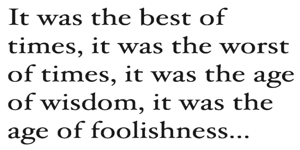

In [8]:
image=Image.open(requests.get('https://i.sstatic.net/IvV2y.png',stream=True).raw)
image=image.resize((300,150))
image.save('sample.png')
image

In [9]:
custom_config=r'-l eng --oem 3 --psm 6'
text=pytesseract.image_to_string(Image.open('sample.png'),config=custom_config)
print(text)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [11]:
try:
  text=pytesseract.image_to_string(image,lang="eng")
  characters_to_remove="!()@-*>+=/,#_$^~.`"
  new_string=text
  for characters in characters_to_remove:
    new_string=new_string.replace(characters,"")
  print(new_string)
except IOError as e:
  print("Error(%s)." % e)


It was the best of
times it was the worst
of times it was the age
of wisdom it was the
age of foolishness



In [13]:
image=cv2.imread('sample.png')

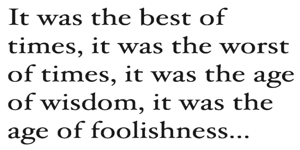

In [14]:
def get_greyscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=get_greyscale(image)
Image.fromarray(image)

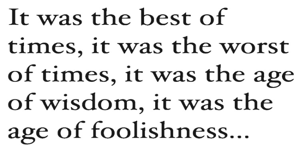

In [15]:
def remove_noise(image):
  return cv2.medianBlur(image,5)
noise=remove_noise(image)
Image.fromarray(gray)

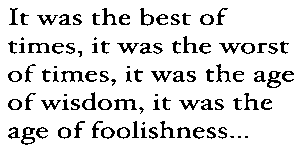

In [16]:
def thresholding(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
thresh=thresholding(gray)
Image.fromarray(thresh)

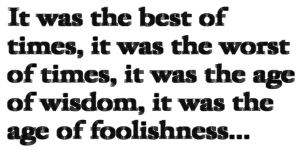

In [18]:
def erode(image):
  kernel=np.ones((3,3),np.uint8)
  return cv2.erode(image,kernel,iterations=1)
erode=erode(image)
Image.fromarray(erode)

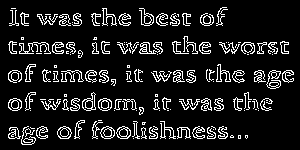

In [19]:
def canny(image):
  return cv2.Canny(image,100,200)
canny=canny(gray)
Image.fromarray(canny)

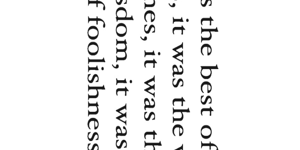

In [20]:
def deskew(image):
  coords=np.column_stack(np.where(image>0))
  angle=cv2.minAreaRect(coords)[-1]
  if angle< -45:
    angle= -(90+angle)
  else:
    angle= -angle
  (h,w)=image.shape[:2]
  center=(w//2,h//2)
  M=cv2.getRotationMatrix2D(center,angle,1.0)
  rotated=cv2.warpAffine(image,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
  return rotated
deskew=deskew(gray)
Image.fromarray(deskew)

In [22]:
def match_template(image,template):
  return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

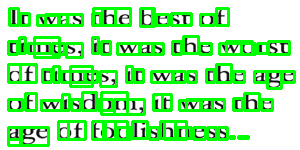

In [24]:
img=cv2.imread('sample.png')
h,w,c=img.shape
boxes=pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b=b.split(' ')
  img=cv2.rectangle(img,(int(b[1]),h-int(b[2])),(int(b[3]),h-int(b[4])),(0,255,0),2)
Image.fromarray(img)

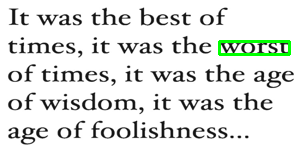

In [25]:
img=cv2.imread('sample.png')
d=pytesseract.image_to_data(img,output_type=Output.DICT)
keys=list(d.keys())
data_pattern='worst'
n_boxes=len(d['text'])
for i in range(n_boxes):
  if float(d['conf'][i])>60:
    if re.match(data_pattern,d['text'][i]):
      (x,y,w,h)=(d['left'][i],d['top'][i],d['width'][i],d['height'][i])
      img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
Image.fromarray(img)